# Glass Identification Data Set

**Attribute Information:**

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    - 1 building_windows_float_processed
    - 2 building_windows_non_float_processed
    - 3 vehicle_windows_float_processed
    - 4 vehicle_windows_non_float_processed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps

Generic imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

IMPORT DATAS

In [ ]:
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data -o ./glass-data.data

In [2]:
df = pd.read_csv('./glass-data.data',sep=',',header=None)

In [3]:
col_names=['id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','type']
df.columns = col_names
df= df.drop(columns=['id'])
df['type'] = df['type'].astype('category')

FIRST LOOK AT DATAS

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


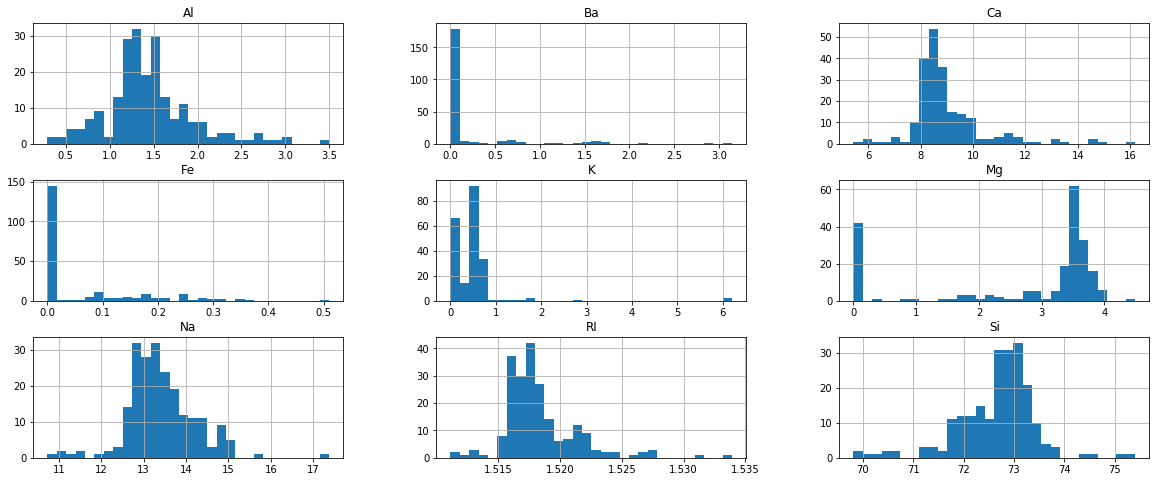

In [7]:
df.hist(bins=30,figsize=(20,8));

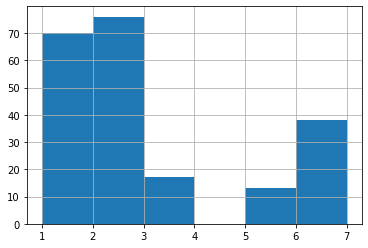

In [8]:
df['type'].hist(bins=6);

In [9]:
corr_matrix = df.corr()

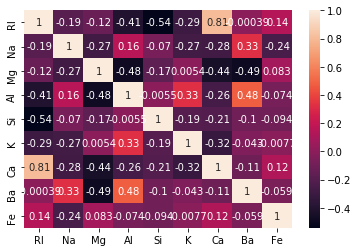

In [10]:
sns.heatmap(corr_matrix,annot=True);

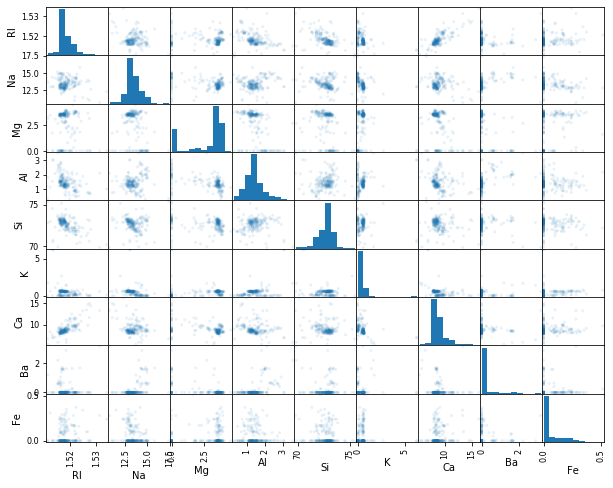

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(10,8),alpha=0.1);

CREATE TRAIN/TEST SETS

In [12]:
from sklearn.model_selection import train_test_split

X=df.drop(labels='type', axis=1)
Y=df['type']

# Create train and test sets
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=37)

SCALE EXPLANATORY VARIABLES

In [13]:
from sklearn.preprocessing import StandardScaler

# Scale x data
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain_s = scaler.transform(xtrain)
xtest_s = scaler.transform(xtest)

TRY DIFFERENT CLASSIFIERS FOR FIRST EVALUATION

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

classifs = [KNeighborsClassifier(),
           DecisionTreeClassifier(random_state=37),
           SVC(),
           RandomForestClassifier(random_state=37),
           AdaBoostClassifier(random_state=37),
           GaussianNB(),
           ]

classif_names=['KNN\t\t', 
               'DecisionTree\t', 
               'SVC\t\t',
               'RandomForest\t',
               'AdaBoost\t',
               'Naive Bayes\t',
               ]

# Apply different classifiers
bestscore=0
bestclf =''
for name, clf in zip(classif_names, classifs):
    classif = clf.fit(xtrain_s, ytrain)
    
    score1 = classif.score(xtest_s, ytest)*100
    print("%s Score : %.2f %%" % (name, score1))
    if score1 > bestscore:
        bestscore = score1
        ypred = classif.predict(xtest_s)
        bestclf = name

KNN		 Score : 69.77 %
DecisionTree	 Score : 69.77 %
SVC		 Score : 74.42 %
RandomForest	 Score : 86.05 %
AdaBoost	 Score : 51.16 %
Naive Bayes	 Score : 41.86 %


In [15]:
print('Best score using: %s' % bestclf)

Best score using: RandomForest	


CROSS VALIDATION EVALUATION

In [16]:
from sklearn.model_selection import cross_val_score

classif = RandomForestClassifier(random_state=37)
model = classif.fit(xtrain_s, ytrain)

accu = cross_val_score(model,xtrain_s, ytrain,scoring='accuracy',cv=5)
                        

print("model scores:",accu)
print("avg:",accu.mean())
print("std dev:",accu.std())

model scores: [0.8        0.70588235 0.82352941 0.58823529 0.79411765]
avg: 0.7423529411764705
std dev: 0.08680407880327864


TRY MODEL IMPROVEMENT BY TUNING PARAMETERS USING GRID SEARCH

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'bootstrap':[True,False],
        'n_estimators':[10,50,100,],
        'max_features':[3,5,7,'auto'],
        'max_depth':[2,5,10,None],
    }
]

classif = RandomForestClassifier(random_state=37)
grid_search = GridSearchCV(classif,param_grid,cv=3,return_train_score=True)
grid_search.fit(xtrain_s,ytrain);

In [25]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 10, 'max_features': 3, 'n_estimators': 100}

In [26]:
grid_search.best_score_

0.7660818713450293

In [27]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

ytrain_pred = cross_val_predict(grid_search.best_estimator_,xtrain_s,ytrain,cv=3)
confmatr = confusion_matrix(ytrain, ytrain_pred)

In [28]:
print(confusion_matrix(ytrain, ytrain_pred))
print(classification_report(ytrain, ytrain_pred))

[[47  7  1  0  0  1]
 [10 46  1  3  1  0]
 [ 6  3  5  0  0  0]
 [ 0  2  0  7  0  1]
 [ 0  1  0  0  6  0]
 [ 1  2  0  0  0 20]]
              precision    recall  f1-score   support

           1       0.73      0.84      0.78        56
           2       0.75      0.75      0.75        61
           3       0.71      0.36      0.48        14
           5       0.70      0.70      0.70        10
           6       0.86      0.86      0.86         7
           7       0.91      0.87      0.89        23

    accuracy                           0.77       171
   macro avg       0.78      0.73      0.74       171
weighted avg       0.77      0.77      0.76       171



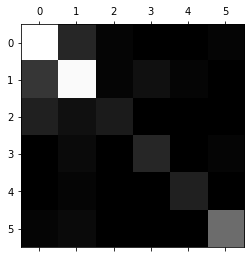

In [29]:
plt.matshow(confmatr,cmap=plt.cm.gray);

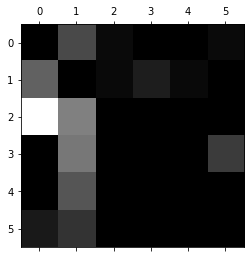

In [30]:
row_sums = confmatr.sum(axis=1,keepdims=True)
norm_conf_matr = confmatr / row_sums
np.fill_diagonal(norm_conf_matr,0)
plt.matshow(norm_conf_matr,cmap=plt.cm.gray);

EVALUATE MODEL ON TEST DATASET

In [31]:
ypred = grid_search.best_estimator_.predict(xtest_s)

score = grid_search.best_estimator_.score(xtest_s, ytest)*100

print("Model score: %.2f%% on test dataset (%d obs)" % (score,len(ytest)))


Model score: 83.72% on test dataset (43 obs)


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

confmatr = confusion_matrix(ytest, ypred)
confm = pd.DataFrame(confmatr)

print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[13  0  1  0  0  0]
 [ 3 12  0  0  0  0]
 [ 1  1  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.86      0.80      0.83        15
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.84        43
   macro avg       0.85      0.82      0.83        43
weighted avg       0.84      0.84      0.83        43



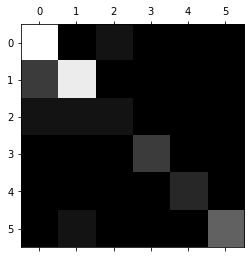

In [33]:
plt.matshow(confmatr,cmap=plt.cm.gray);

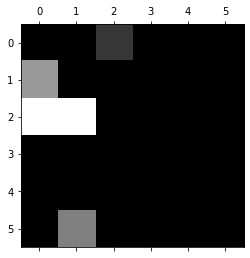

In [34]:
row_sums = confmatr.sum(axis=1,keepdims=True)
norm_conf_matr = confmatr / row_sums
np.fill_diagonal(norm_conf_matr,0)
plt.matshow(norm_conf_matr,cmap=plt.cm.gray);